# ENTERPRISE AI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from string import punctuation
import warnings
from collections import Counter
import re
import tensorflow as tf 
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout,SpatialDropout1D,Embedding

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
dataset = pd.read_csv('Amazon Product Reviews1.csv')

## 2) Understanding data

dataset has 10 columns and 568454 rows. Important columns are productid, userid, score and text. 

In [3]:
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


### info() :


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


### describe():


In [6]:
dataset.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## 3) Removing missing values


In [7]:
dataset = dataset.dropna()

<b> We can see that we have remove all missing values and we are ready for the next step. </b>

In [4]:
for col in dataset:
    print(col + ": " + str(dataset[col].isnull().values.any()) + " count: " + str(dataset[col].isnull().sum()))

NameError: name 'dataset' is not defined

## 3-4) Data Analysis and Data Visualization



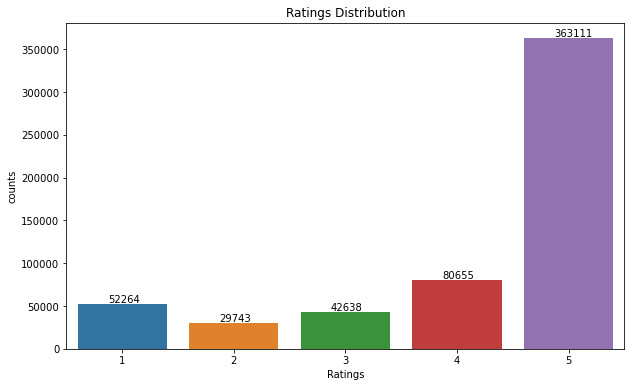

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x ='Score', data = dataset) 
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.27, p.get_height()+2000))
plt.show()

In [9]:
unique_product = dataset['ProductId'].value_counts().reset_index().sort_values('index',ascending=True)
unique_product = unique_product.rename(columns = {'ProductId':'Counts','index':'ProductId'})
unique_product = unique_product.reset_index(drop=True)
print(unique_product.sort_values('Counts', ascending = False))

        ProductId  Counts
71170  B007JFMH8M     913
42263  B002QWP89S     632
42264  B002QWP8H0     632
42257  B002QWHJOU     632
37898  B0026RQTGE     632
...           ...     ...
38955  B0029TATL0       1
38973  B0029TJR7M       1
38984  B0029U7OBM       1
38986  B0029USWFE       1
74257  B009WVB40S       1

[74258 rows x 2 columns]


In [10]:
average_score_count = dataset.groupby(['ProductId','Score']).Score.sum().reset_index(name='TotalReview')
total_review_count = average_score_count.groupby('ProductId')['TotalReview'].sum().reset_index(name='TotalReview').sort_values('ProductId', ascending = True)

In [8]:
total_review_count['ProductCount'] = unique_product['Counts']
total_review_count['AverageScore'] = round(total_review_count['TotalReview'] / total_review_count['ProductCount'],2)
total_review_count

NameError: name 'unique_product' is not defined

<b> To trust any ratings, we need to put some threshold on number of reviews. I am finding reviews with greater than 200 review on that product. So we can rely on ratings more as more people have give their opinion about product. We can see that only 300 product have more than 200 reviews. </b>

In [11]:
total_review_count_sorted = total_review_count[total_review_count['ProductCount'] > 200].sort_values('AverageScore').reset_index(drop=True)
total_review_count_sorted

KeyError: 'ProductCount'

In [12]:
for i in range(1,len(total_review_count_sorted),101):
    plt.figure(figsize=(25,10))
    ax = sns.countplot(x ='AverageScore', data = total_review_count_sorted.iloc[i:i+101]) 
    plt.title('Ratings Distribution of score whose product review counts are more than 200')
    plt.xlabel('Ratings')
    plt.ylabel('counts')
    plt.show()

NameError: name 'total_review_count_sorted' is not defined

In [13]:
dataset.groupby(['UserId','ProfileName']).size().reset_index(name="Count").sort_values(['Count'],ascending=False)

,UserId,ProfileName,Count
182042,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",448
65599,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",421
252312,AY12DBB0U420B,Gary Peterson,389
82934,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",365
66175,A1Z54EM24Y40LL,c2,256
...,...,...,...
101210,A2HRJ9LQ8ONG2S,Nicole Bennett,1
101211,A2HRJMGPNEF3DF,"Linda J. Mcdonell ""Linda Mac""",1
101212,A2HRKI86DC1MOQ,vanbushden,1
101213,A2HRKQ55KIZVO3,ridinghood,1


## 6) LSTM implementation 



In [14]:
dataset = dataset.drop( columns = {'HelpfulnessNumerator','HelpfulnessDenominator','Time'})

In [13]:
dataset['Sentiment'] = 0
dataset['Sentiment'][dataset.Score >= 3] = 1
dataset

NameError: name 'dataset' is not defined

<b> We can see that over 85% reviews are positive and around 15% review are negative. </b>

In [15]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'Sentiment',data = dataset)
plt.xticks([0,1],['Negative','Positive'])
plt.title('Review classification in percentage')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/len(dataset)), (p.get_x()+0.36, p.get_height()+2000))
plt.show()

ValueError: Could not interpret input 'Sentiment'

<Figure size 720x432 with 0 Axes>

In [15]:
text_list = dataset.Text.to_list()
count,sums = 0,0
text_list
for each_review in text_list:
    count += 1
    sums += len(each_review)

print("Number of reviews = {} and length of all reviews = {}".format(count,sums))
print("Average length of a review {:.2f}".format(sums/count))

NameError: name 'dataset' is not defined

In [16]:
dataset['Text'] = dataset['Text'].str.lower()
dataset['Text'] = dataset['Text'].str.replace('[{}]'.format(punctuation), '')

NameError: name 'dataset' is not defined

In [17]:
text_list = dataset.Text.to_list()
tokenizer = Tokenizer(num_words=len(text_list))
tokenizer.fit_on_texts(text_list)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(text_list)
padded_sequence = pad_sequences(encoded_docs, maxlen=400)

NameError: name 'dataset' is not defined

In [18]:
print(text_list[0])
print(encoded_docs[0])

NameError: name 'text_list' is not defined

In [19]:
print(padded_sequence[0])

NameError: name 'padded_sequence' is not defined

In [20]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=400) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

NameError: name 'Sequential' is not defined

In [21]:
import numpy as np
history = model.fit(padded_sequence,np.array(dataset.Sentiment.to_list()),validation_split=0.2, epochs=1, batch_size=32)

NameError: name 'model' is not defined

<b> We will save our trained model into .h5 format to use any time. So now our model is trained and now we need to test our model. </b>

In [22]:
model.save('my_model.h5') 
model = tf.keras.models.load_model('my_model.h5')

NameError: name 'model' is not defined

## 7) Testing our model
### 1)

In [23]:
test_word ="This movie had the best acting and the dialogue was so good. I loved it."
actual_result = 1
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result -> {} & actual result -> {}".format(prediction,actual_result))

NameError: name 'tokenizer' is not defined

## 2)

In [ ]:
test_word ="When I use my computer for long periods of time, I usually start to cramp up in my hand. This wrist brace has helped my hand so I don't have that problem anymore. It makes it more comfortable and easy to feel like it is helping the structure of my hand. Really worth the purchase, and very cost effective. Think anyone using computer for long periods of times should use this to avoid damage to your hand."
actual_result = 1
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result -> {} & actual result -> {}".format(prediction,actual_result))

## 3) 

In [1]:
test_word ="This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go. Unfortunately, it is made of very stretchable rubber. Once in place with just the right amount of tightness, it 'gives' and becomes loose after 5 minutes or so. I found myself having to unwrap it and re-install frequently. It didn't get the job done, so I returned it."
actual_result = 0
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=400)
prediction = int(model.predict(tw).round().item())
print("Sentiment :- Negative -> 0 & Postive -> 1")
print("predictied result: {} & actual result: {}".format(prediction,actual_result))

NameError: name 'tokenizer' is not defined